In [1]:
train_dir = r"C:\Users\R\Downloads\Messy vs Clean Room\train"
validation_dir = r"C:\Users\R\Downloads\Messy vs Clean Room\val"

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

In [3]:
train_generator = train_datagen.flow_from_directory(
    directory=train_dir, target_size=(150, 150), color_mode='rgb', class_mode='binary', batch_size=32, shuffle=True, 
    seed=2021)
validation_generator = test_datagen.flow_from_directory(
    directory=validation_dir, target_size=(150, 150), color_mode='rgb', class_mode='binary', batch_size=32, shuffle=True, 
    seed=2021)
#color_mode = grayscale for B/W images

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [4]:
import numpy as np
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf

## VGG16

In [5]:
from tensorflow.keras.applications.vgg16 import VGG16
pre_trained_model = VGG16(input_shape=(224, 224, 3),include_top=False,
                                pooling='max', weights='imagenet')

In [6]:
print(pre_trained_model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [7]:
# freeze the layers
for layer in pre_trained_model.layers:
    layer.trainable = False

last_layer = pre_trained_model.get_layer('global_max_pooling2d')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 512)


In [8]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [9]:
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = tf.keras.layers.Dense(256, activation='relu')(last_output)
# Add a final sigmoid layer for classification
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
#EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
                        verbose=1, mode='auto',restore_best_weights=True)
# compile the model
model.compile(optimizer='adam',loss='binary_crossentropy', metrics = ['accuracy'])

# train the model (adjust the number of epochs from 1 to improve performance)
history = model.fit(train_generator, validation_data=validation_generator,epochs=50,
                              verbose=2, callbacks=[monitor])

Epoch 1/50
6/6 - 442s - loss: 0.7245 - accuracy: 0.5990 - val_loss: 0.5076 - val_accuracy: 0.6500 - 442s/epoch - 74s/step
Epoch 2/50
6/6 - 229s - loss: 0.3936 - accuracy: 0.8177 - val_loss: 0.3945 - val_accuracy: 0.8000 - 229s/epoch - 38s/step
Epoch 3/50
6/6 - 222s - loss: 0.3150 - accuracy: 0.8906 - val_loss: 0.2356 - val_accuracy: 0.9500 - 222s/epoch - 37s/step
Epoch 4/50
6/6 - 394s - loss: 0.2289 - accuracy: 0.9323 - val_loss: 0.2127 - val_accuracy: 0.9500 - 394s/epoch - 66s/step
Epoch 5/50
6/6 - 333s - loss: 0.1868 - accuracy: 0.9531 - val_loss: 0.1765 - val_accuracy: 0.9500 - 333s/epoch - 56s/step
Epoch 6/50
6/6 - 256s - loss: 0.1603 - accuracy: 0.9583 - val_loss: 0.1685 - val_accuracy: 0.9500 - 256s/epoch - 43s/step
Epoch 7/50
6/6 - 237s - loss: 0.1381 - accuracy: 0.9635 - val_loss: 0.1526 - val_accuracy: 0.9500 - 237s/epoch - 39s/step
Epoch 8/50
6/6 - 240s - loss: 0.1270 - accuracy: 0.9479 - val_loss: 0.1491 - val_accuracy: 0.9500 - 240s/epoch - 40s/step
Epoch 9/50
6/6 - 228s - 

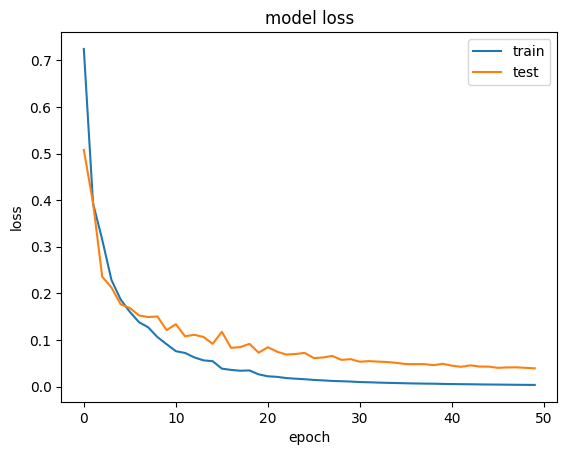

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [12]:
test2_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_dir = r"C:\Users\R\Downloads\Messy vs Clean Room\test"
test_generator =  test2_datagen.flow_from_directory(test_dir, class_mode  = None,
                                                    target_size = (150, 150),
                                                    shuffle=False)


Found 10 images belonging to 1 classes.


In [13]:
y_prob = model.predict(test_generator,callbacks=[monitor])
y_pred = ["M" if probs > 0.5 else "C" for probs in y_prob]
y_pred

1/1 [==============================] - 12s 12s/step


['M', 'C', 'M', 'C', 'M', 'M', 'C', 'M', 'M', 'M']